Dwi Krisdanarti

## Indikator penilaian
## Wajib di google colab, jika tidak di google colab ada pengurangan nilai -5
## Pengerjaan harus sesuai template yang disediakan, jika tidak ada pengurangan nilai -5 (untuk memudahkan membaca code)
## share to arifromadhan19@gmail.com

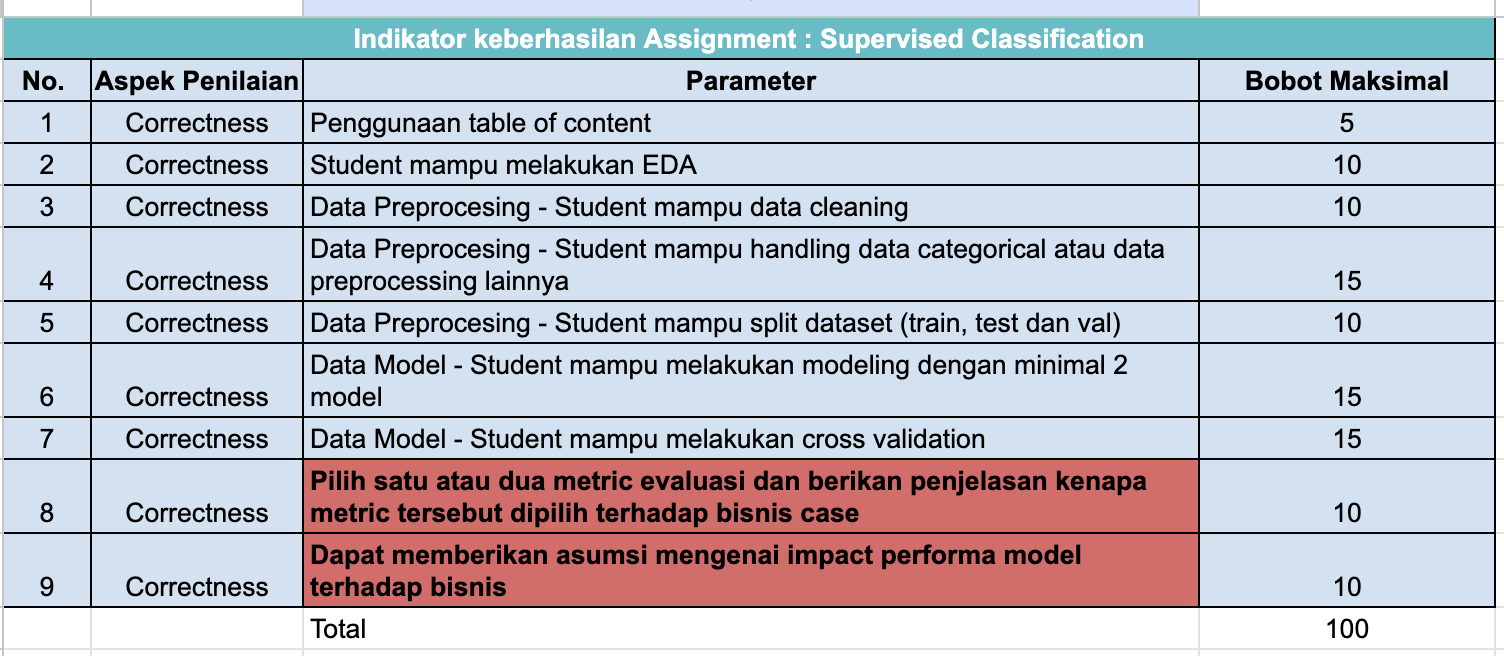

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore') # mengabaikan 'warnings' yang muncul saat menjalankan code

import numpy as np # operasi math dan numerik
import pandas as pd # mengelola data dalam bentuk dataframe
import seaborn as sns # visualisasi data
import matplotlib.pyplot as plt # membuat plot/grafik
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE # over sampling
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing # untuk normalisasi dan encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer # mengisi missing value
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split # split data train and test
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix # untuk eval

## Load dataset

In [ ]:
df = pd.read_csv('/content/TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Features in the Telco Customer Churn Dataset

1. **customerID**:  
   Unique identifier for each customer.

2. **gender**:  
   Gender of the customer (e.g., Male, Female).

3. **SeniorCitizen**:  
   Whether the customer is a senior citizen (1 = Yes, 0 = No).

4. **Partner**:  
   Whether the customer has a partner (Yes, No).

5. **Dependents**:  
   Whether the customer has dependents (Yes, No).

6. **tenure**:  
   Number of months the customer has been with the company.

7. **PhoneService**:  
   Whether the customer subscribes to phone service (Yes, No).

8. **MultipleLines**:  
   Whether the customer has multiple lines (Yes, No).

9. **InternetService**:  
   The type of internet service the customer subscribes to (DSL, Fiber optic, No).

10. **OnlineSecurity**:  
    Whether the customer subscribes to online security service (Yes, No).

11. **OnlineBackup**:  
    Whether the customer subscribes to online backup service (Yes, No).

12. **DeviceProtection**:  
    Whether the customer subscribes to device protection (Yes, No).

13. **TechSupport**:  
    Whether the customer subscribes to tech support service (Yes, No).

14. **StreamingTV**:  
    Whether the customer subscribes to streaming TV service (Yes, No).

15. **StreamingMovies**:  
    Whether the customer subscribes to streaming movies service (Yes, No).

16. **Contract**:  
    Type of contract the customer has (Month-to-month, One year, Two year).

17. **PaperlessBilling**:  
    Whether the customer has paperless billing (Yes, No).

18. **PaymentMethod**:  
    Payment method the customer uses (Electronic check, Mailed check, Bank transfer, Credit card).

19. **MonthlyCharges**:  
    The amount charged to the customer monthly for services.

20. **TotalCharges**:  
    The total amount charged to the customer (could include charges from previous months).

21. **Churn**:  
    Whether the customer has churned (Yes, No). This is the target variable.


In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


Menghapus spasi yang terdapat di TotalCharges

In [ ]:
df = df.loc[-df['TotalCharges'].str.contains(' ')]

Merubah tipe TotalCharges dari object ke float

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [ ]:
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
No,5890
Yes,1142


In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Mengubah SeniorCitizen 0: 'No', 1: 'Yes'

### Univariate Analysis

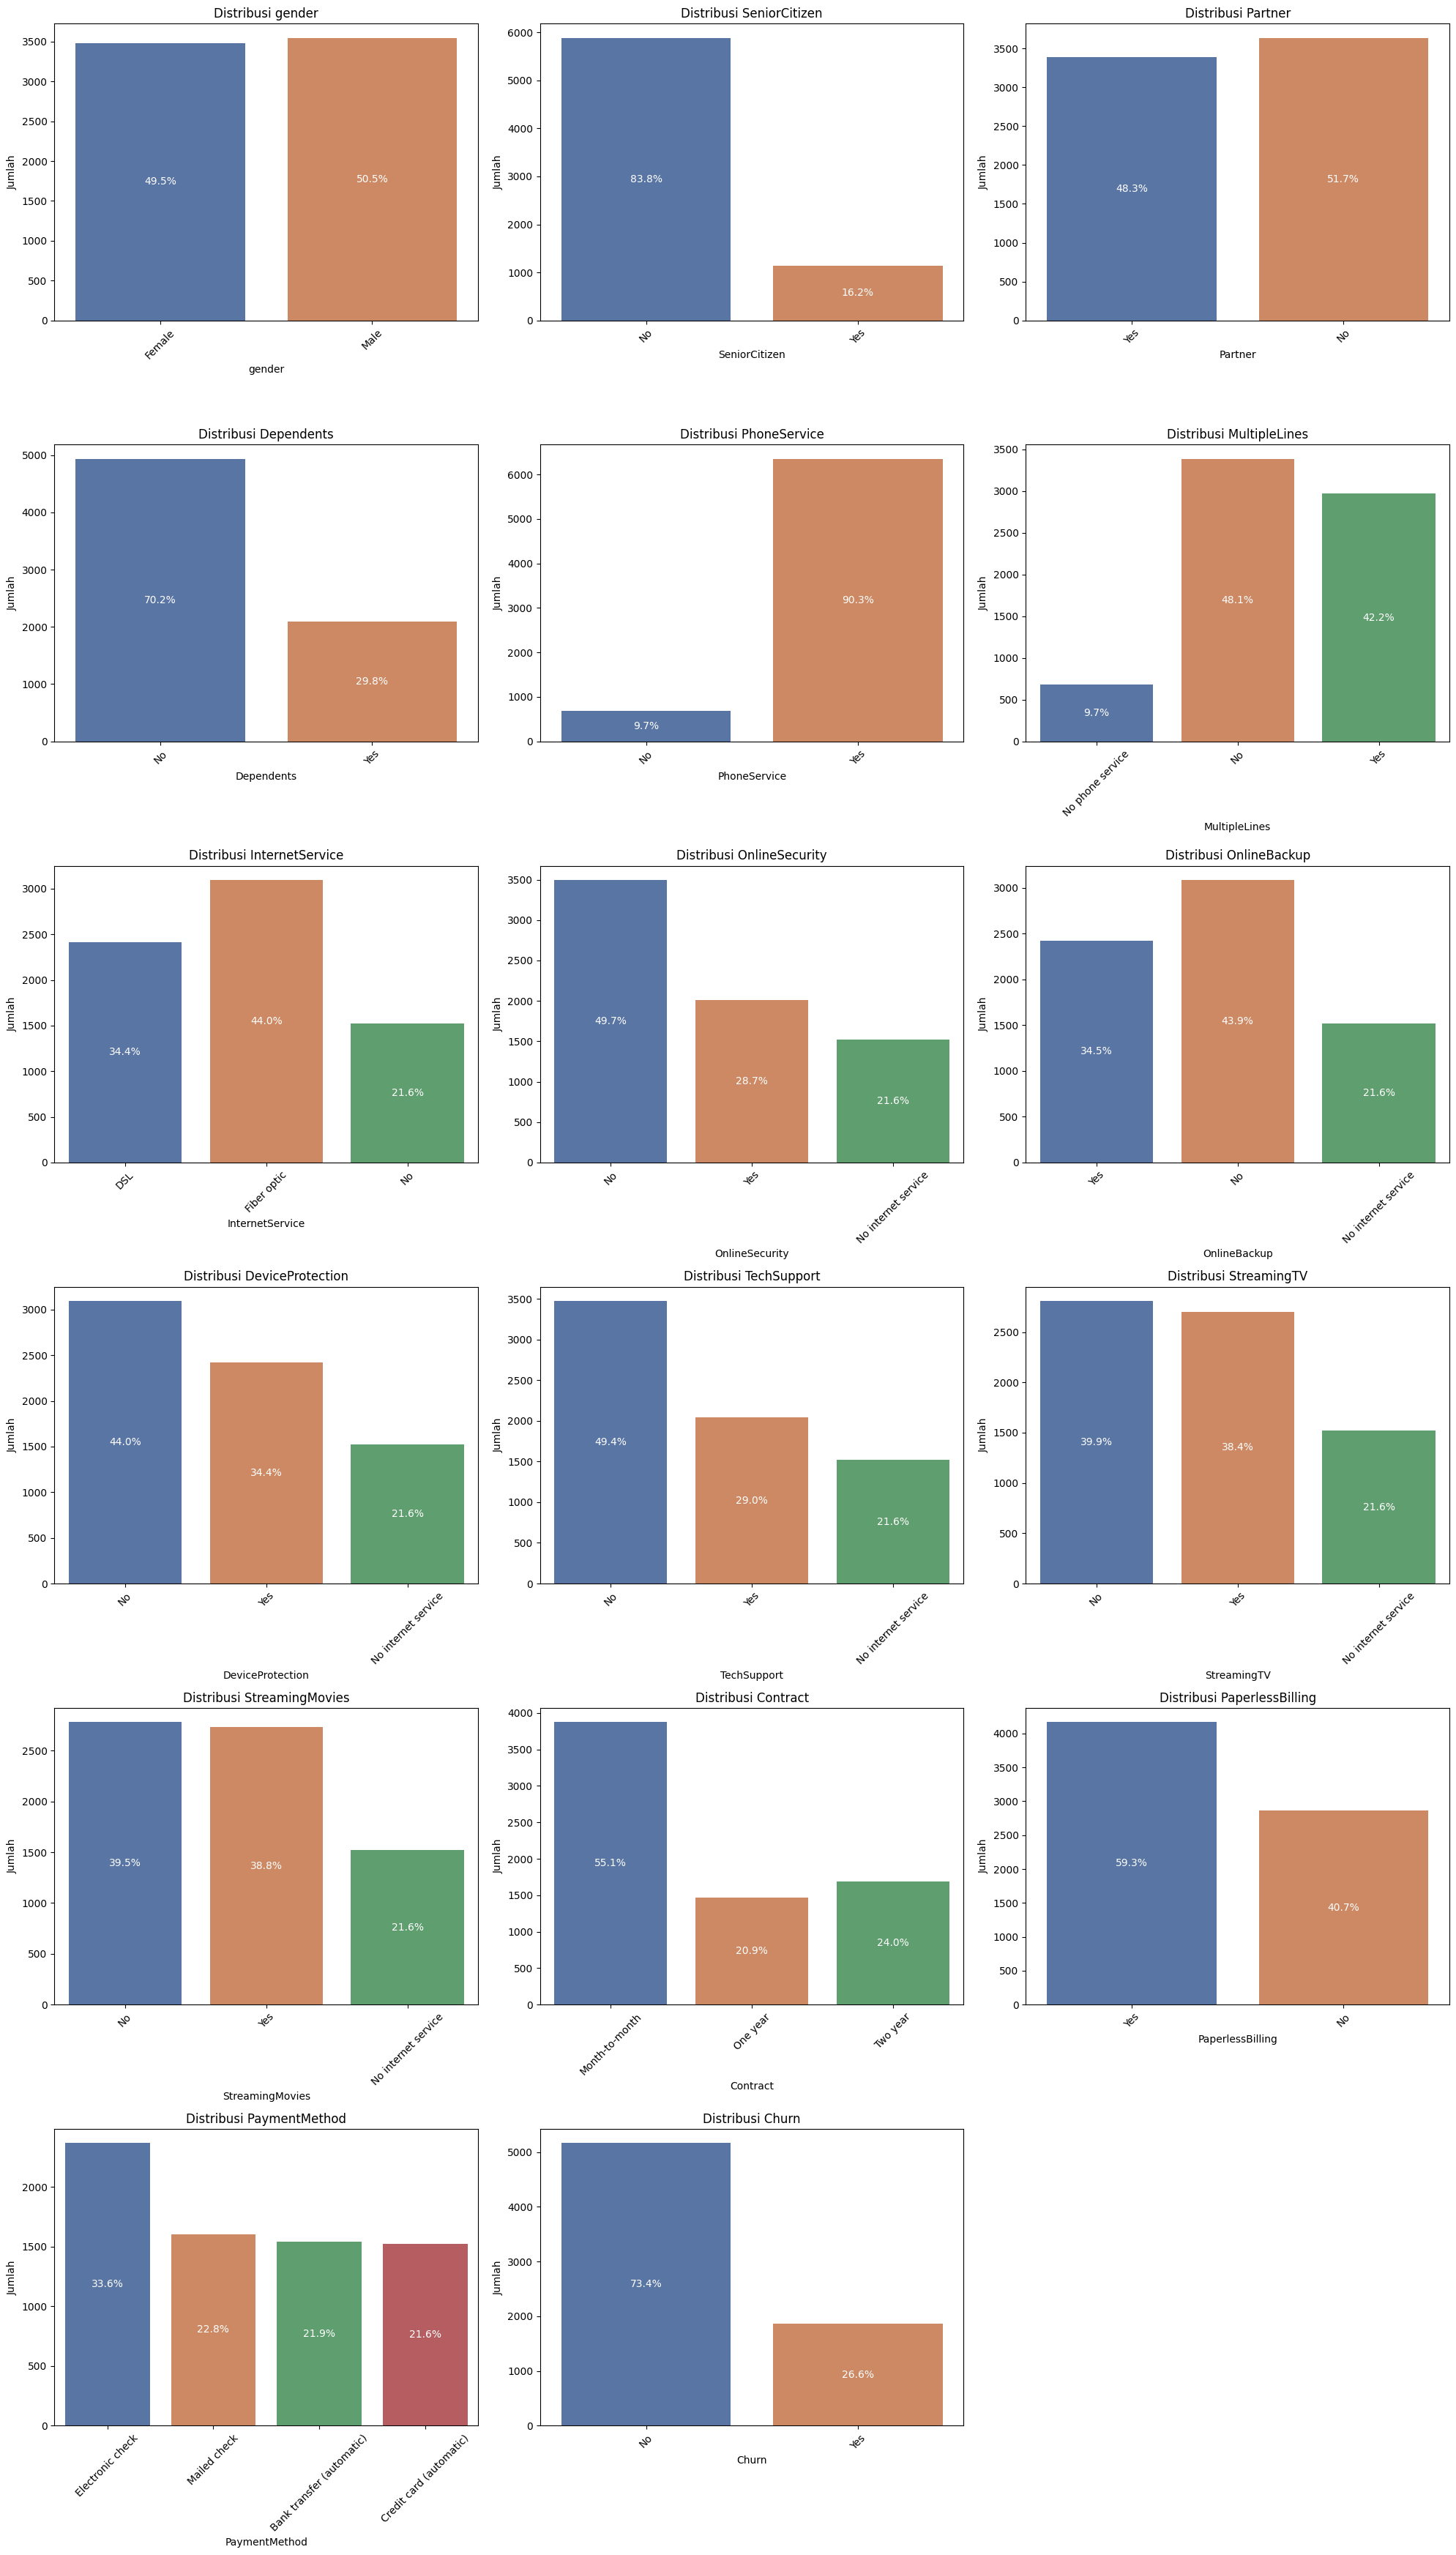

In [ ]:
plt.figure(figsize=(20, 35))

# Loop untuk membuat grafik batang untuk setiap kolom kategorikal
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, data=df, palette='deep')
    total = len(df[col])

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{percentage:.1f}%',
                ha='center', va='center', fontsize=10, color='white')

    # jdul untuk setiap grafik
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Jumlah')

    # label sumbu x (nama batang) menjadi miring
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


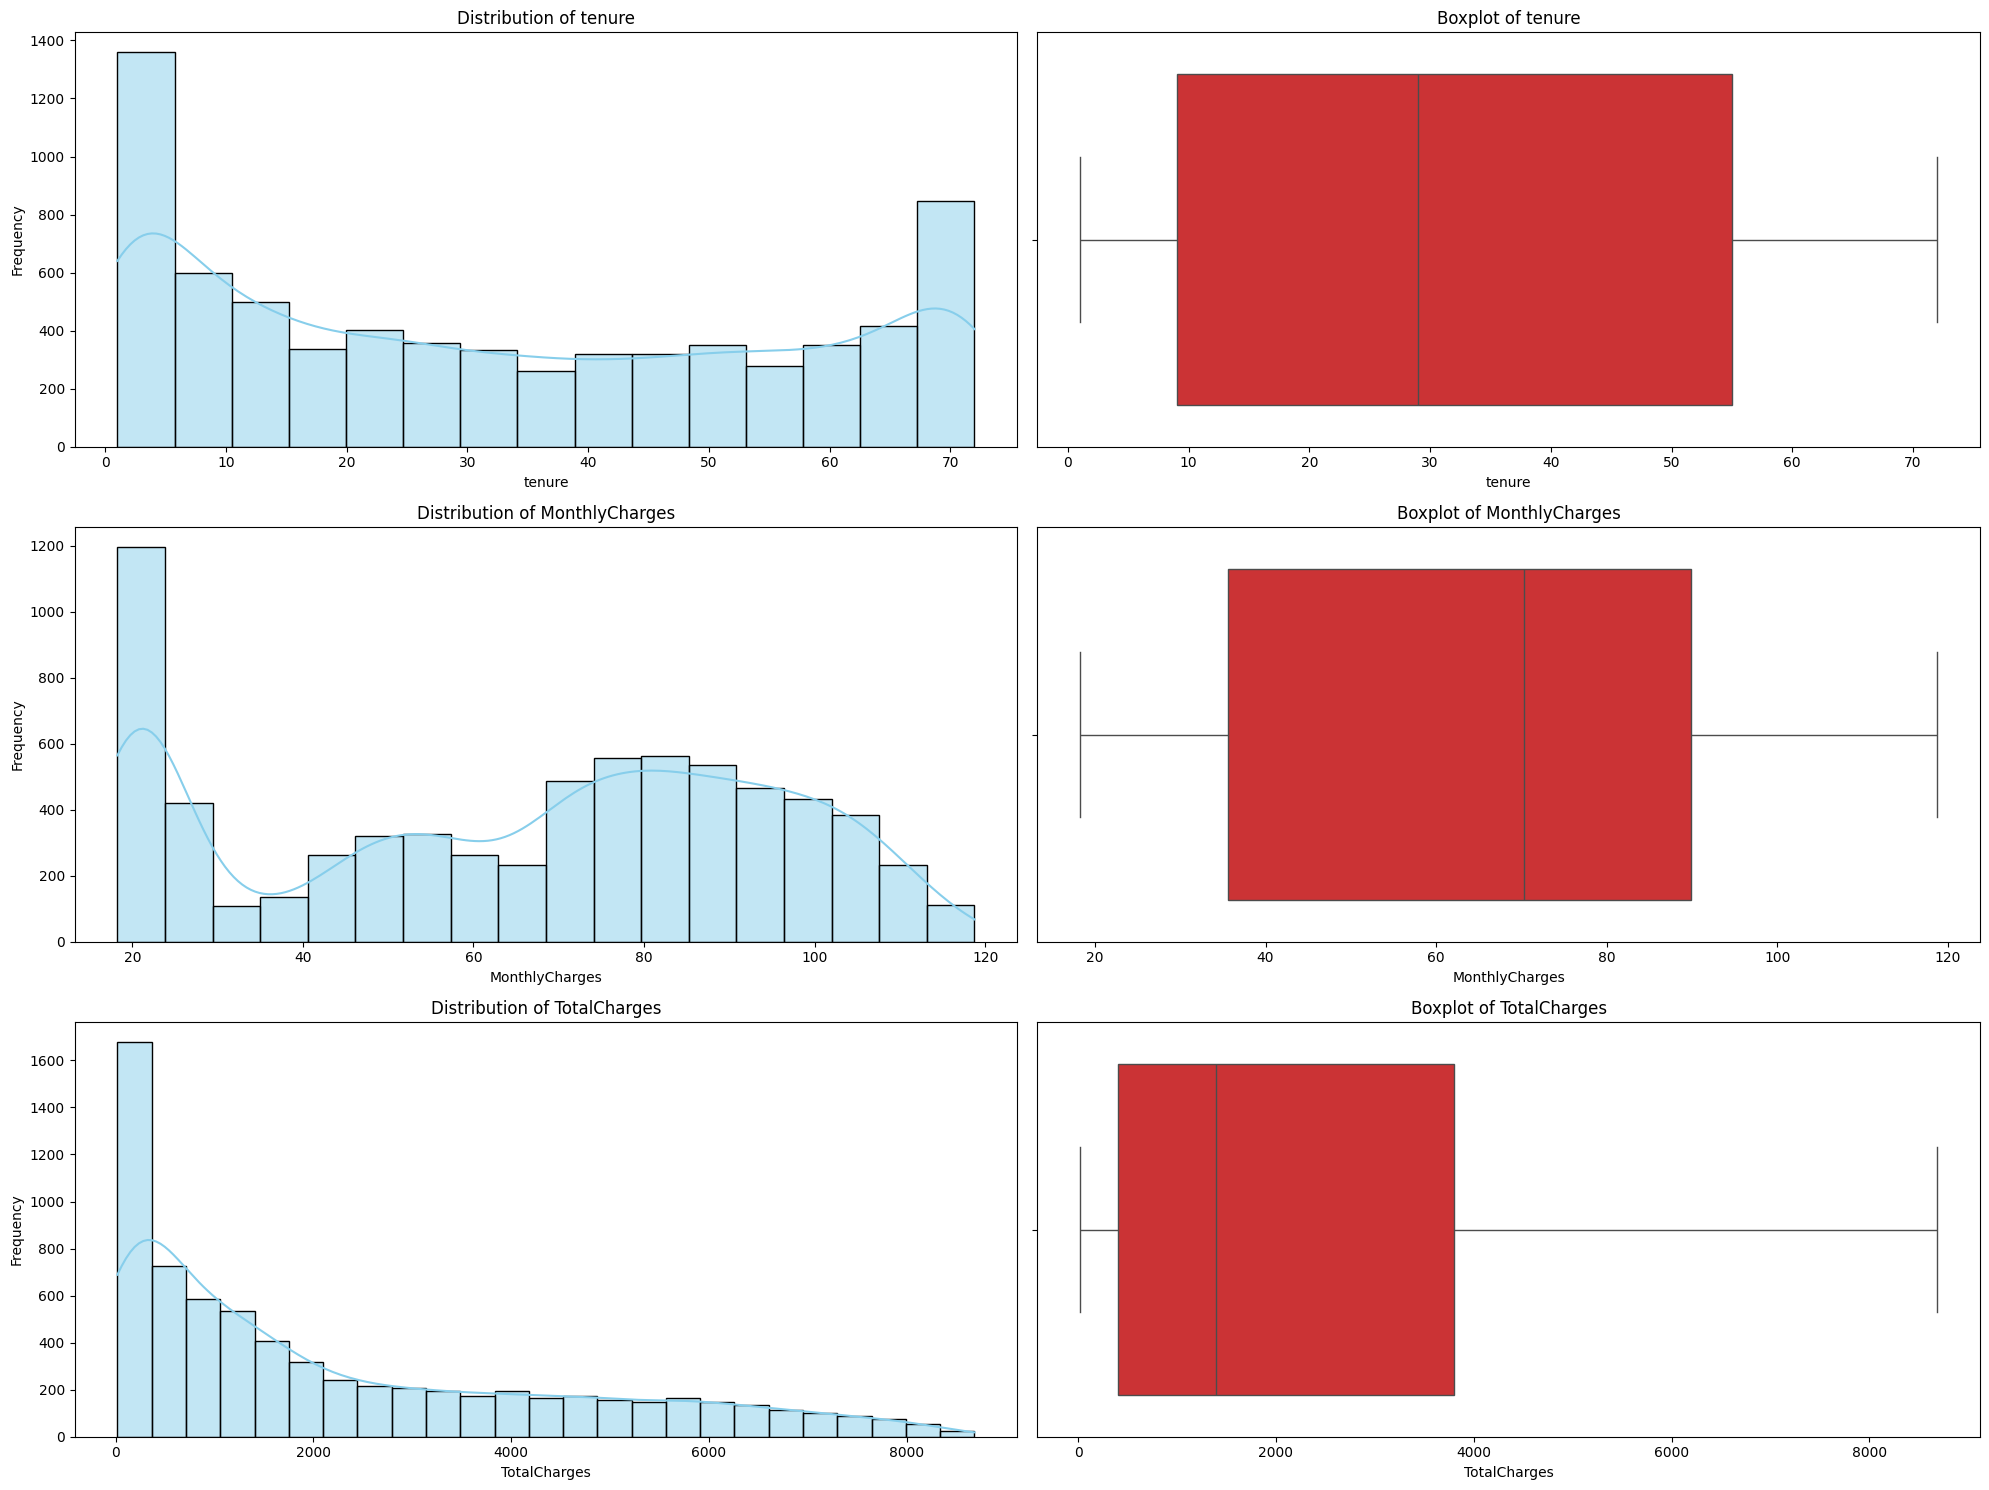

In [ ]:
plt.figure(figsize=(20, 15))

# Loop untuk membuat histogram dan boxplot untuk setiap fitur numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, 2*i-1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_columns), 2, 2*i)
    sns.boxplot(x=df[col], palette='Set1')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


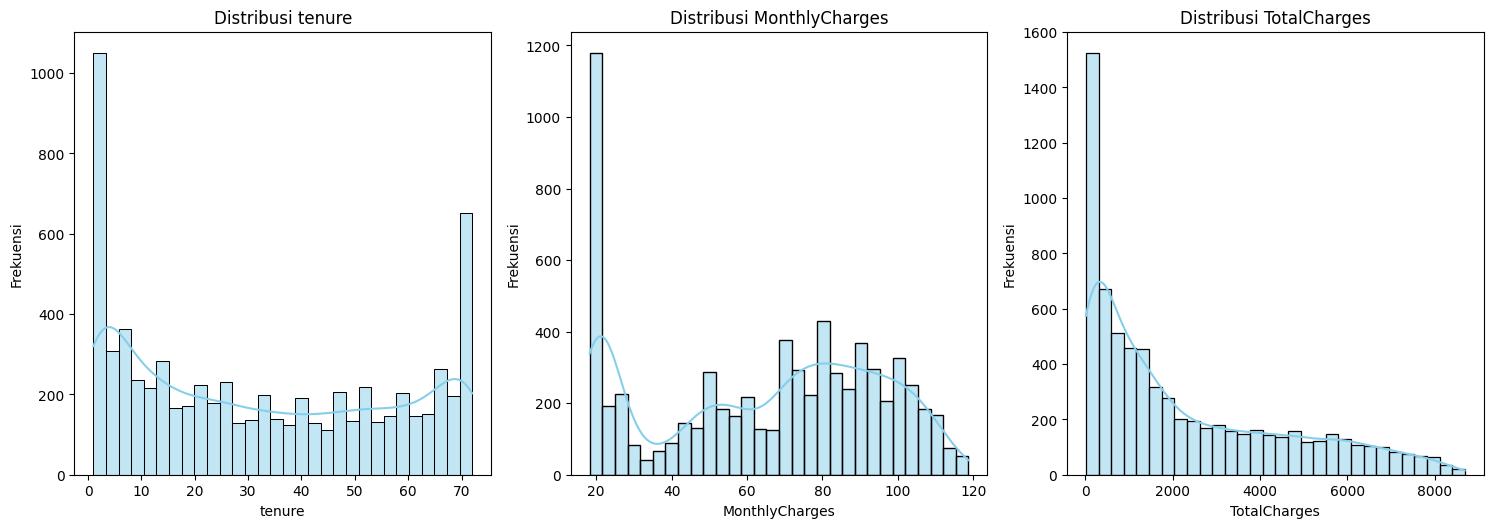

In [ ]:
plt.figure(figsize=(20, 20))

# Loop untuk membuat histogram dan boxplot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)

    # Histogram
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    plt.tight_layout()
plt.show()

### Bivariate Analysis

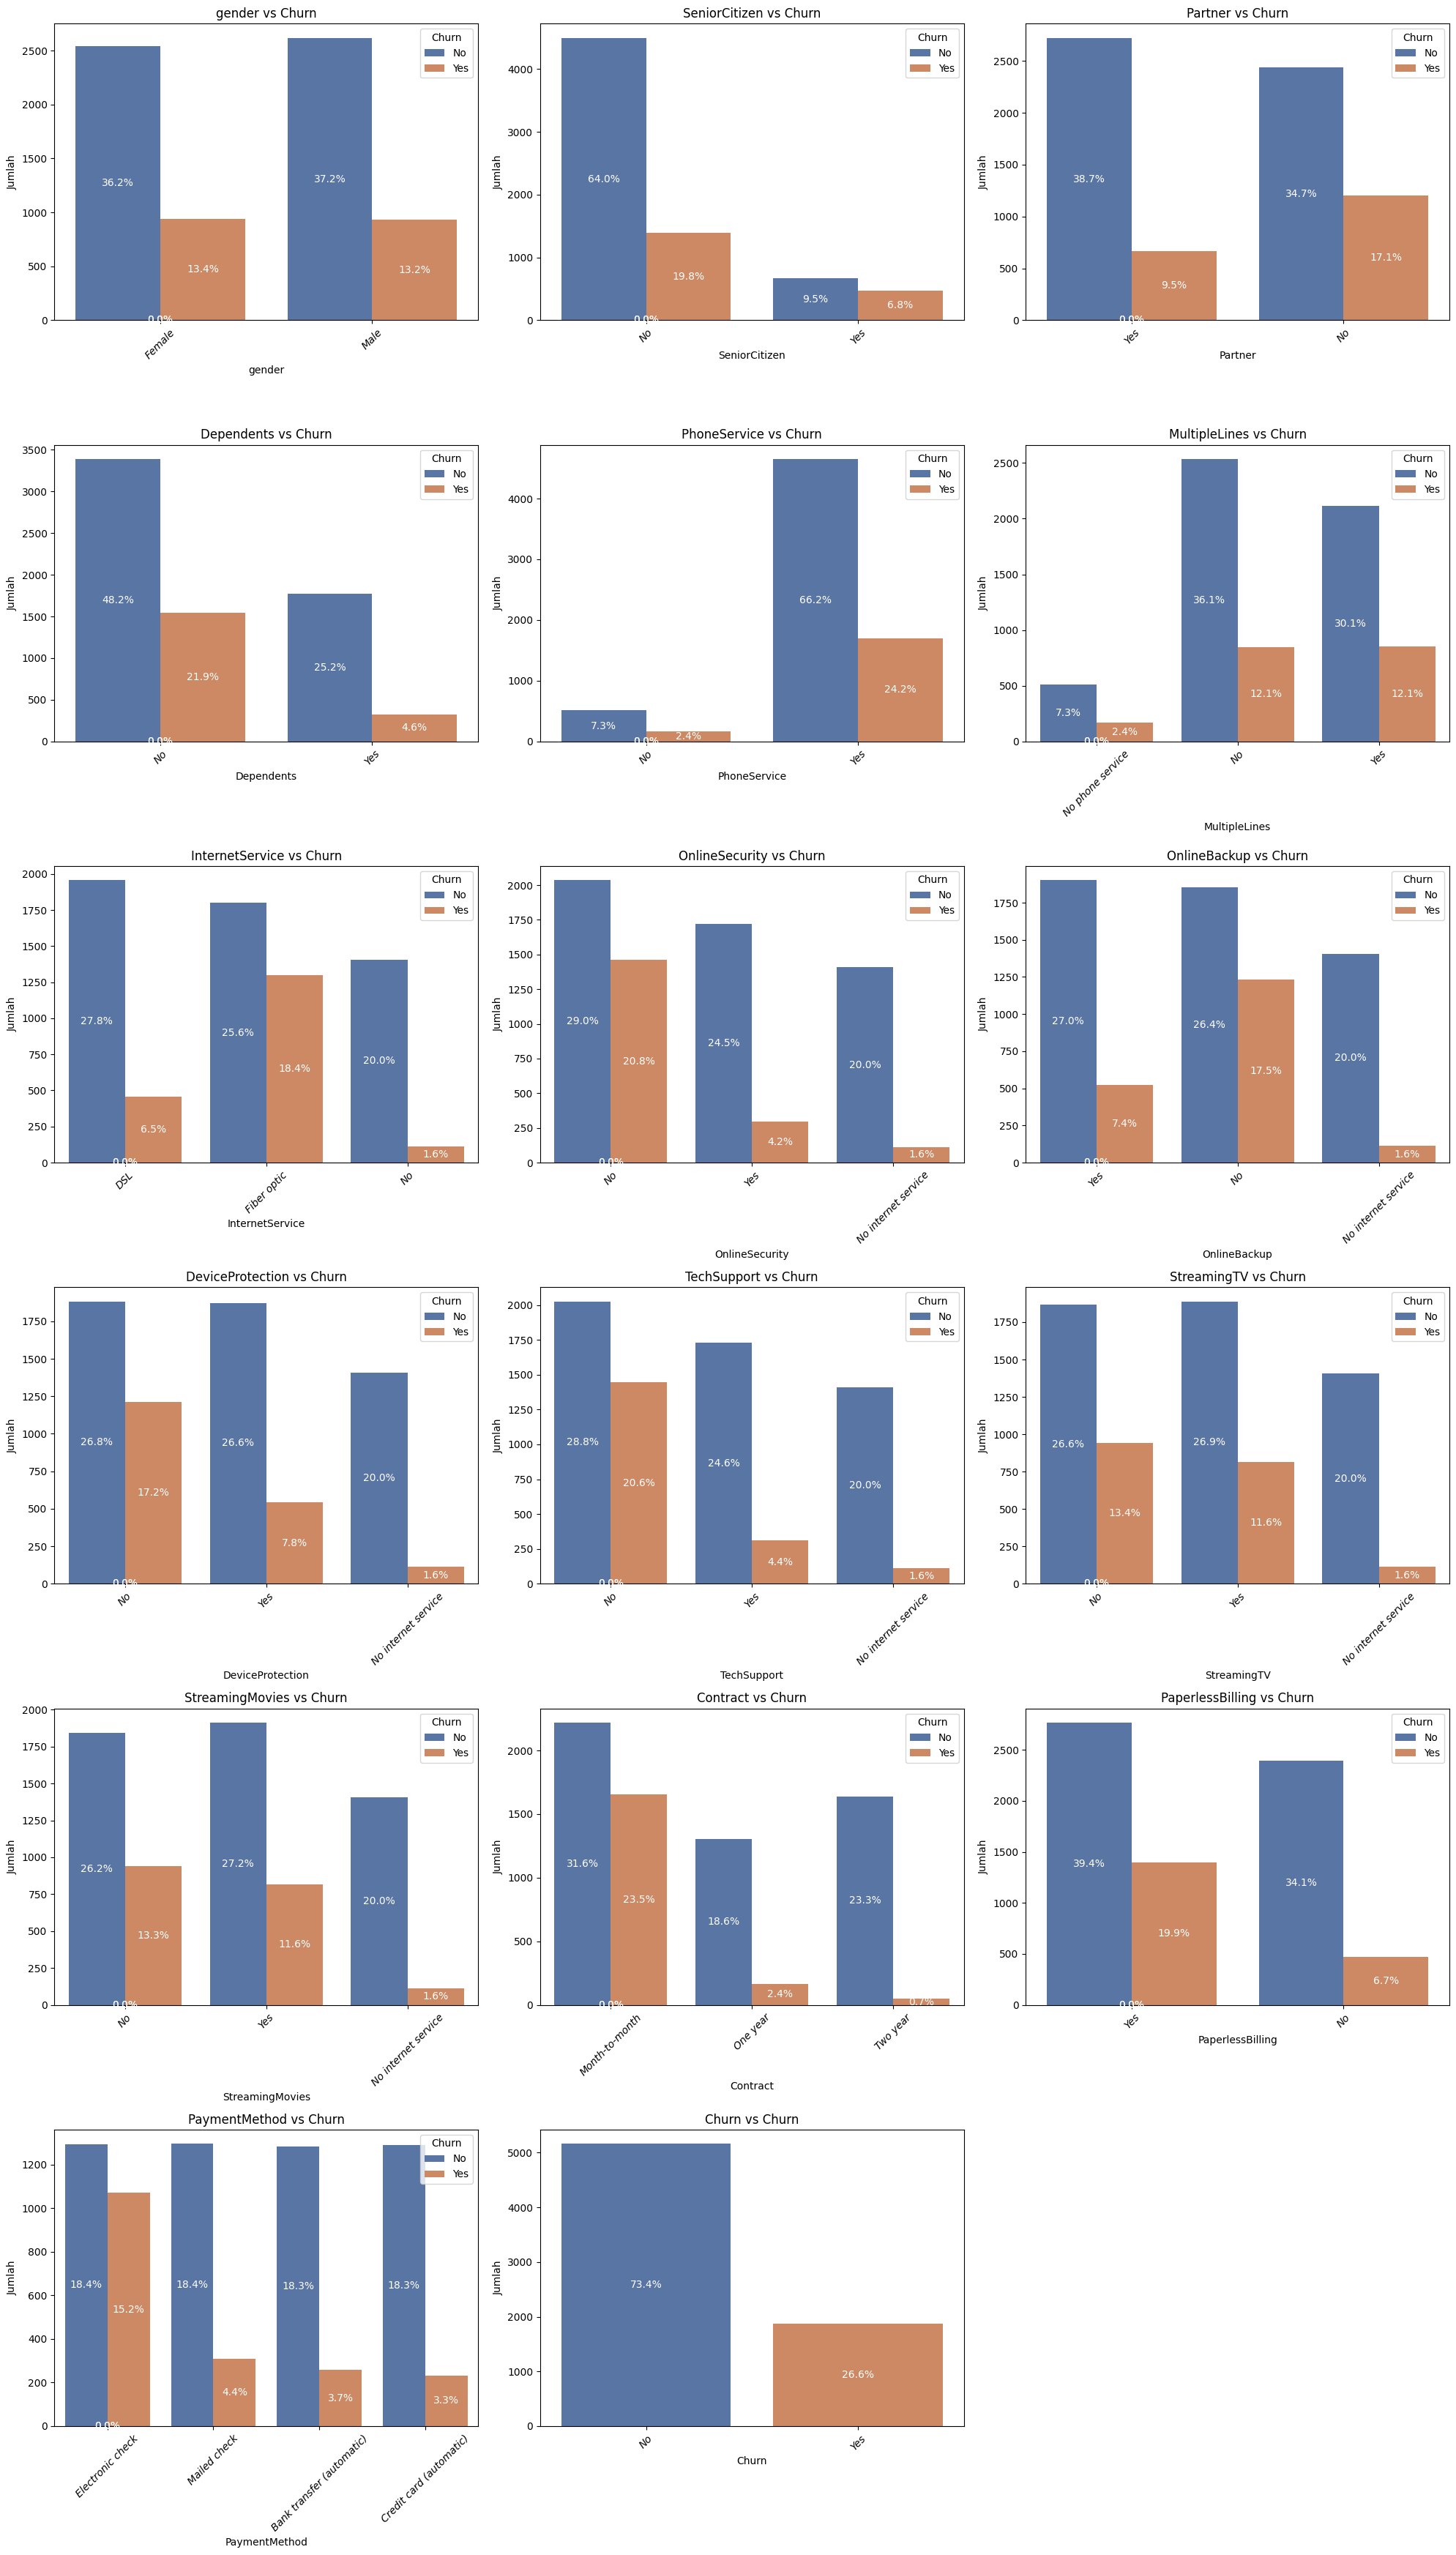

In [ ]:
plt.figure(figsize=(20, 35))

# Loop untuk membuat bar plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, hue='Churn', data=df, palette='deep')

    # Menmpilkan persentase di dalam batang
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='center', fontsize=10, color='white')

    # judul dan label
    ax.set_title(f'{col} vs Churn', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Jumlah')

    plt.xticks(rotation=45, style='italic')

plt.tight_layout()
plt.show()


<Figure size 1200x1200 with 0 Axes>

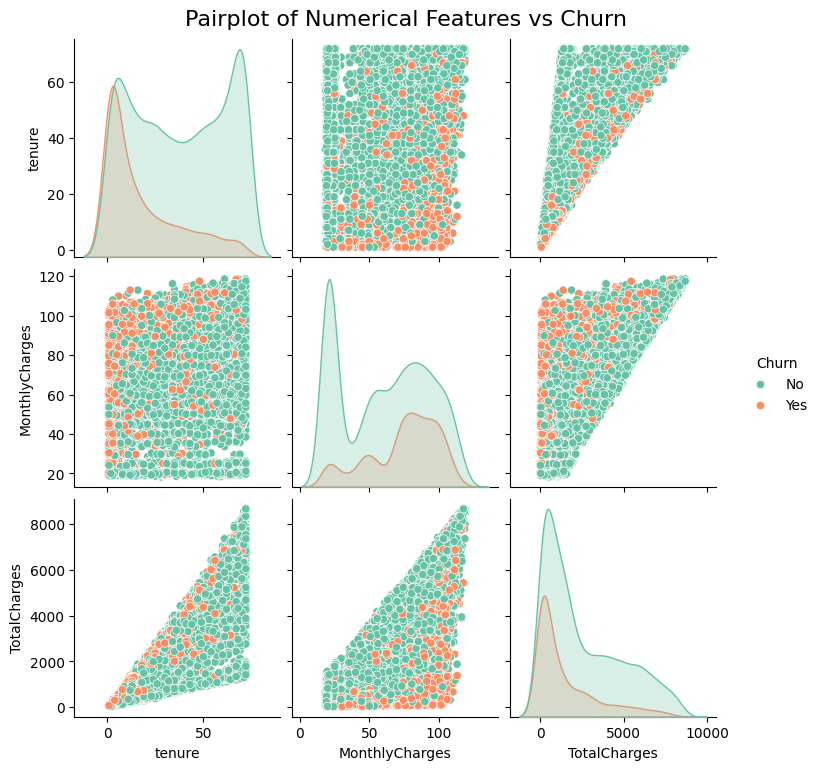

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 12))
sns.pairplot(df[numerical_columns.tolist() + ['Churn']], hue='Churn', palette='Set2', diag_kind='kde')

plt.suptitle('Pairplot of Numerical Features vs Churn', y=1.02, fontsize=16)
plt.show()


### OUtlier

In [ ]:
# mendeteksi outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# jmlah outlier di setiap kolom numerikal
for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"{col} - Jumlah Outlier: {len(outliers)}")

tenure - Jumlah Outlier: 0
MonthlyCharges - Jumlah Outlier: 0
TotalCharges - Jumlah Outlier: 0


### Feature Enginering

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# nilai unik untuk setiap kolom
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print("-" * 50)

Column: gender
Unique values: ['Female' 'Male']
--------------------------------------------------
Column: SeniorCitizen
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: Partner
Unique values: ['Yes' 'No']
--------------------------------------------------
Column: Dependents
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: PhoneService
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: MultipleLines
Unique values: ['No phone service' 'No' 'Yes']
--------------------------------------------------
Column: InternetService
Unique values: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Column: OnlineSecurity
Unique values: ['No' 'Yes' 'No internet service']
--------------------------------------------------
Column: OnlineBackup
Unique values: ['Yes' 'No' 'No internet service']
--------------------------------------------------
Column: DeviceProtection

In [ ]:
# Daftar kolom yang memiliki nilai 'No internet service' yang ingin diganti
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Mengganti nilai 'No internet service' menjadi 'No'
df[columns_to_replace] = df[columns_to_replace].replace('No phone service', 'No')
df[columns_to_replace] = df[columns_to_replace].replace('No internet service', 'No')

# nilai unik setelah perubahan
for col in columns_to_replace:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print("-" * 50)


Column: MultipleLines
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: OnlineSecurity
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: OnlineBackup
Unique values: ['Yes' 'No']
--------------------------------------------------
Column: DeviceProtection
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: TechSupport
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: StreamingTV
Unique values: ['No' 'Yes']
--------------------------------------------------
Column: StreamingMovies
Unique values: ['No' 'Yes']
--------------------------------------------------


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Encoding

In [ ]:
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
              'PaperlessBilling', 'Churn', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies','MultipleLines','SeniorCitizen']

le = LabelEncoder()

for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
# Cek nilai unik di tiap fitur
print("Nilai unik di kolom 'Contract':", df['Contract'].unique())
print("Nilai unik di kolom 'PaymentMethod':", df['PaymentMethod'].unique())
print("Nilai unik di kolom 'InternetService':", df['InternetService'].unique())

Nilai unik di kolom 'Contract': ['Month-to-month' 'One year' 'Two year']
Nilai unik di kolom 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Nilai unik di kolom 'InternetService': ['DSL' 'Fiber optic' 'No']


In [ ]:
one_hot_cols = ['Contract', 'PaymentMethod', 'InternetService']

ohe = OneHotEncoder(drop='first', sparse_output=False)

ohe_result = ohe.fit_transform(df[one_hot_cols])

ohe_columns = ohe.get_feature_names_out(one_hot_cols)

ohe_df = pd.DataFrame(ohe_result, columns=ohe_columns)

In [ ]:
df = pd.concat([df.drop(columns=one_hot_cols).reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7028,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7029,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7030,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Split Dataset

In [ ]:
X = df.drop(['Churn'],axis = 1) #menentukan target atau label
Y = df['Churn']

# Memisahkan dataset menjadi train (60%) dan test (40%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Memisahkan dataset test menjadi validation (20%) dan test (20%)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# cek jumlah
print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Train set: 4219 samples
Validation set: 1406 samples
Test set: 1407 samples


## Train and Val

### Data Preprocessing

### Missing Value

In [ ]:
X_train.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
X_val.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


Tidak ada missing valeu

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
1476,1,0,1,1,72,0,0,1,1,1,1,1,1,1,65.10,4754.30,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2240,0,0,1,0,69,1,1,0,0,1,1,1,1,0,105.35,7240.65,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6316,0,0,1,1,17,1,0,1,0,0,1,1,0,0,91.85,1574.45,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6326,0,0,0,0,14,1,0,0,0,0,1,1,1,1,69.65,921.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5865,0,0,0,0,10,1,1,0,0,1,0,1,1,1,100.60,1060.20,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,0,0,3,1,1,0,0,0,0,0,0,0,50.40,137.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0,0,0,0,51,1,1,0,1,1,1,1,1,1,111.50,5703.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5226,1,0,0,0,9,1,1,1,0,0,0,0,0,1,81.15,784.45,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5390,0,0,0,0,50,1,0,0,0,0,0,0,0,0,19.75,989.05,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_val

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
216,1,0,1,1,72,0,0,1,1,1,1,0,0,0,45.25,3139.80,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3002,0,1,0,0,32,1,0,0,1,0,0,0,0,1,74.40,2276.95,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3252,1,0,0,0,22,1,0,0,1,0,0,1,1,1,93.20,2157.30,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2439,0,1,0,0,31,1,1,0,1,0,0,1,1,1,99.95,3186.65,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6596,1,1,0,0,66,1,1,0,1,1,1,1,1,0,110.90,7432.05,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,0,0,0,0,13,0,0,0,1,0,0,0,0,0,29.15,357.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6627,0,0,1,1,10,1,1,1,1,0,0,1,0,0,70.30,676.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3315,1,1,1,0,18,1,0,1,0,0,0,0,1,1,59.10,1011.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2167,0,0,0,0,1,1,0,0,0,0,0,0,0,0,43.95,43.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Smote

Distribusi Kelas pada Data Train:
Churn
0    3084
1    1135
Name: count, dtype: int64

Distribusi Kelas pada Data Validation:
Churn
0    1034
1     372
Name: count, dtype: int64


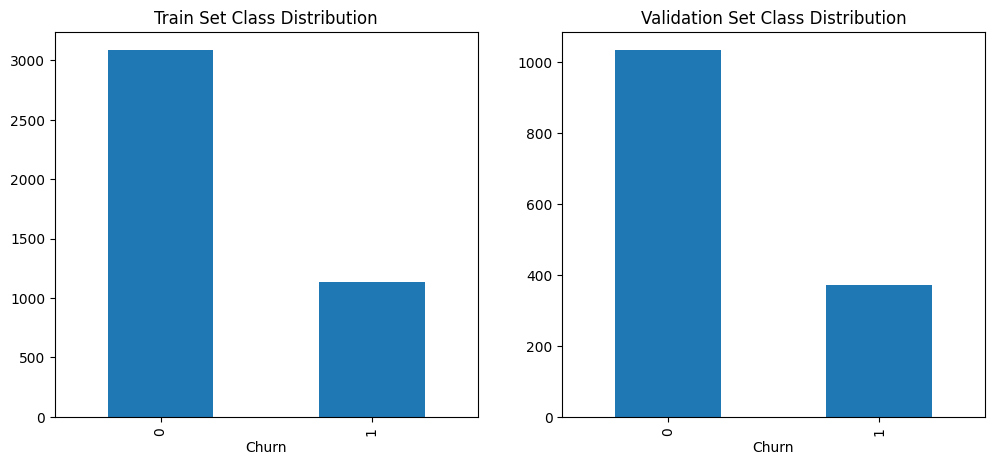

In [ ]:
# Distribusi pada data train
print("Distribusi Kelas pada Data Train:")
print(Y_train.value_counts())

# Distribusi pada data validation
print("\nDistribusi Kelas pada Data Validation:")
print(Y_val.value_counts())

# Visualisasi distribusi kelas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
Y_train.value_counts().plot(kind='bar', ax=ax[0], title='Train Set Class Distribution')
Y_val.value_counts().plot(kind='bar', ax=ax[1], title='Validation Set Class Distribution')
plt.show()

In [ ]:
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data train, data val tidak boleh di smote(?)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Cek distribusi kelas setelah SMOTE
print("\nDistribusi Kelas pada Data Train setelah SMOTE:")
print(Y_train.value_counts())


Distribusi Kelas pada Data Train setelah SMOTE:
Churn
0    3084
1    3084
Name: count, dtype: int64


### Scaling

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_val_minmax = minmax_scaler.transform(X_val)

X_train = pd.DataFrame(X_train_minmax, columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_minmax, columns=X_val.columns, index=X_val.index)


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,1.0,0.0,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.468734,0.546443,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,1.0,0.0,0.957746,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.871436,0.833354,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.0
2,0.0,0.0,1.0,1.0,0.225352,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.736368,0.179507,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0
3,0.0,0.0,0.0,0.0,0.183099,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.514257,0.104149,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.126761,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.823912,0.120166,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,1.0,0.0,1.0,0.0,0.408451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174244,0.120894,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
6164,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.573062,0.016105,0.000000,0.0,0.0,0.014628,0.985372,1.000000,0.0
6165,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466997,0.015724,0.000000,0.0,0.0,0.792758,0.000000,0.207242,0.0
6166,0.0,0.0,0.0,0.0,0.112676,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.284639,0.049792,0.286764,0.0,0.0,1.000000,0.000000,0.000000,0.0


In [ ]:
X_val

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
216,1.0,0.0,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.270135,0.360139,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3002,0.0,1.0,0.0,0.0,0.436620,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.561781,0.260572,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3252,1.0,0.0,0.0,0.0,0.295775,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.749875,0.246765,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2439,0.0,1.0,0.0,0.0,0.422535,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.817409,0.365546,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6596,1.0,1.0,0.0,0.0,0.915493,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.926963,0.855440,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,0.0,0.0,0.0,0.0,0.169014,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.109055,0.039038,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6627,0.0,0.0,1.0,1.0,0.126761,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.520760,0.075849,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3315,1.0,1.0,1.0,0.0,0.239437,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.408704,0.114494,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2167,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257129,0.002896,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, Y_train, X_val, Y_val):

    model.fit(X_train, Y_train)

    # data train
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # data validation
    Y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(Y_val, Y_val_pred)

    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print("\nConfusion Matrix on Validation Data:")
    print(confusion_matrix(Y_val, Y_val_pred))
    print("\nClassification Report on Validation Data:")
    print(classification_report(Y_val, Y_val_pred))

    return model

### Cross Validation

In [ ]:
def cross_validate_model_f1(model, X, Y, cv=5):
    # Cross-validation scoring dengan F1 Score
    scores = cross_val_score(model, X, Y, cv=cv, scoring='f1')

    print(f"Cross-Validation F1 Scores for {model.__class__.__name__}: {scores}")
    print(f"Mean F1 Score: {np.mean(scores):.2f}")
    print(f"Standard Deviation: {np.std(scores):.2f}")
    print("-" * 50)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
print("=== Decision Tree ===")
cross_validate_model_f1(dt_model, X_train, Y_train, cv=5)

=== Decision Tree ===
Cross-Validation F1 Scores for DecisionTreeClassifier: [0.60079051 0.67149321 0.87311178 0.88639761 0.87202381]
Mean F1 Score: 0.78
Standard Deviation: 0.12
--------------------------------------------------


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
print("=== Random Forest ===")
cross_validate_model_f1(rf_model, X_train, Y_train, cv=5)

=== Random Forest ===
Cross-Validation F1 Scores for RandomForestClassifier: [0.65554465 0.73807381 0.91320755 0.91291291 0.92758089]
Mean F1 Score: 0.83
Standard Deviation: 0.11
--------------------------------------------------


In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
print("=== XGBoost ===")
cross_validate_model_f1(xgb_model, X_train, Y_train, cv=5)

=== XGBoost ===
Cross-Validation F1 Scores for XGBClassifier: [0.624      0.70985401 0.91317365 0.91180867 0.92401216]
Mean F1 Score: 0.82
Standard Deviation: 0.13
--------------------------------------------------


### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [ ]:
print("=== Decision Tree ===")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = evaluate_model(dt_model, X_train, Y_train, X_val, Y_val)

=== Decision Tree ===
Train Accuracy: 1.00
Validation Accuracy: 0.72

Confusion Matrix on Validation Data:
[[807 227]
 [170 202]]

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1034
           1       0.47      0.54      0.50       372

    accuracy                           0.72      1406
   macro avg       0.65      0.66      0.65      1406
weighted avg       0.73      0.72      0.72      1406



In [ ]:
print("\n=== Random Forest ===")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model = evaluate_model(rf_model, X_train, Y_train, X_val, Y_val)


=== Random Forest ===
Train Accuracy: 1.00
Validation Accuracy: 0.78

Confusion Matrix on Validation Data:
[[892 142]
 [170 202]]

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1034
           1       0.59      0.54      0.56       372

    accuracy                           0.78      1406
   macro avg       0.71      0.70      0.71      1406
weighted avg       0.77      0.78      0.78      1406



In [ ]:
print("\n=== XGBoost ===")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model = evaluate_model(xgb_model, X_train, Y_train, X_val, Y_val)



=== XGBoost ===
Train Accuracy: 0.97
Validation Accuracy: 0.77

Confusion Matrix on Validation Data:
[[875 159]
 [167 205]]

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1034
           1       0.56      0.55      0.56       372

    accuracy                           0.77      1406
   macro avg       0.70      0.70      0.70      1406
weighted avg       0.77      0.77      0.77      1406



Kesimpulan: Berdasarkan evaluasi di atas, Random Forest adalah model terbaik karena memiliki akurasi tertinggi, serta precision, recall, dan F1-score yang lebih baik pada kelas 1 (Churn=1) dibandingkan model lainnya.

## Test

### Data Preprocessing

### Missing Value

In [ ]:
X_test.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
6272,1,0,0,0,6,1,0,0,0,0,0,0,0,0,20.60,116.60,1.0,0.0,0.0,0.0,1.0,0.0,1.0
45,0,0,0,0,49,1,1,0,0,0,0,0,1,1,84.50,3906.70,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4977,0,0,1,1,72,1,1,1,0,1,1,1,1,1,83.30,6042.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5030,0,0,0,0,10,1,0,0,0,0,0,0,0,1,19.30,185.20,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1580,1,0,1,0,42,1,1,1,0,0,1,1,1,0,80.45,3375.90,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,1,0,0,0,4,1,0,0,0,0,0,0,0,0,44.55,220.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0
434,1,0,1,0,41,1,0,0,0,0,0,0,0,1,19.75,899.45,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2890,0,0,1,0,37,1,0,0,0,0,0,0,0,1,19.85,717.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0
168,1,1,1,0,58,0,0,0,1,1,0,0,1,1,45.30,2651.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Scaling

In [ ]:
minmax_scaler = MinMaxScaler()
X_test_minmax = minmax_scaler.fit_transform(X_test)

X_test = pd.DataFrame(X_test_minmax, columns=X_test.columns, index=X_test.index)

### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [ ]:
print("=== Decision Tree ===")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

Y_test_pred_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(Y_test, Y_test_pred_dt)

print(f"Test Accuracy: {test_accuracy_dt:.2f}")
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(Y_test, Y_test_pred_dt))
print("\nClassification Report on Test Data:")
print(classification_report(Y_test, Y_test_pred_dt))


=== Decision Tree ===
Test Accuracy: 0.74

Confusion Matrix on Test Data:
[[816 229]
 [141 221]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1045
           1       0.49      0.61      0.54       362

    accuracy                           0.74      1407
   macro avg       0.67      0.70      0.68      1407
weighted avg       0.76      0.74      0.75      1407



In [ ]:
print("\n=== Random Forest ===")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)

Y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)

print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(Y_test, Y_test_pred_rf))
print("\nClassification Report on Test Data:")
print(classification_report(Y_test, Y_test_pred_rf))


=== Random Forest ===
Test Accuracy: 0.78

Confusion Matrix on Test Data:
[[894 151]
 [160 202]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1045
           1       0.57      0.56      0.57       362

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [ ]:
print("\n=== XGBoost ===")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)

Y_test_pred_xgb = xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(Y_test, Y_test_pred_xgb)

print(f"Test Accuracy: {test_accuracy_xgb:.2f}")
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(Y_test, Y_test_pred_xgb))
print("\nClassification Report on Test Data:")
print(classification_report(Y_test, Y_test_pred_xgb))



=== XGBoost ===
Test Accuracy: 0.77

Confusion Matrix on Test Data:
[[880 165]
 [161 201]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1045
           1       0.55      0.56      0.55       362

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



Kesimpulan: Random Forest adalah model yang lebih unggul jika memperhatikan akurasi keseluruhan serta performa pada kelas 1 (Churn), terutama dalam hal precision, recall, dan F1-score.

### Potential impact

Simulasikan potential impact

### 1. **Decision Tree**
- **Test Accuracy**: 74%
- **F1-Score**: Cukup rendah (0.50 pada kelas 1), menunjukkan model kesulitan dalam menangani kelas yang tidak seimbang (misalnya kelas minoritas).
- **Recall untuk Kelas 1**: 61% – model ini cukup baik dalam mendeteksi kelas minoritas, meskipun precision-nya hanya 49%.
  
**Kelemahan**:
- Decision Tree sering rentan terhadap overfitting dan cenderung memberikan hasil yang tidak terlalu stabil pada data yang lebih kompleks.
- Meskipun memiliki kemampuan recall yang baik untuk kelas minoritas, presisinya rendah, yang dapat memengaruhi keputusan bisnis yang membutuhkan akurasi tinggi dalam identifikasi kelas tertentu.

---

### 2. **Random Forest**
- **Test Accuracy**: 78%
- **F1-Score**: 0.57 untuk kelas 1 – lebih baik daripada Decision Tree, menunjukkan performa yang lebih seimbang antara precision dan recall.
- **Recall untuk Kelas 1**: 56%, masih lebih rendah dari kelas mayoritas, tetapi lebih baik daripada Decision Tree.

**Kelebihan**:
- Random Forest lebih stabil dibandingkan Decision Tree, mengurangi risiko overfitting dan memiliki kemampuan untuk menangani data yang lebih kompleks dengan lebih baik.
- Meskipun recall untuk kelas 1 tidak terlalu tinggi, F1-score yang lebih baik dan akurasi yang lebih tinggi (78%) menjadikannya model yang lebih andal untuk kasus bisnis yang membutuhkan kestabilan dan kinerja yang lebih baik secara keseluruhan.

---

### 3. **XGBoost**
- **Test Accuracy**: 77%
- **F1-Score**: 0.55 untuk kelas 1 – sedikit lebih rendah dari Random Forest, tetapi cukup seimbang antara precision dan recall.
- **Recall untuk Kelas 1**: 56%, mirip dengan Random Forest, tetapi lebih sedikit menangani kelas minoritas secara tepat.

**Kelebihan**:
- XGBoost sering kali memberikan hasil yang sangat baik dalam banyak kasus karena kemampuannya untuk mengurangi bias dan varians melalui boosting.
- Meskipun akurasi dan F1-score pada kelas 1 sedikit lebih rendah, model ini tetap dapat berfungsi dengan baik pada dataset besar dan memberikan hasil yang cukup konsisten.

---

### **Kesimpulan untuk Kasus Bisnis dan Potensi Dampak**:
- **Random Forest** adalah pilihan terbaik untuk aplikasi bisnis yang memerlukan keseimbangan antara akurasi dan kinerja pada kelas minoritas. Dengan **test accuracy** yang lebih tinggi (78%) dan **F1-score** yang lebih baik (0.57 pada kelas 1), **Random Forest** menawarkan kombinasi stabilitas dan kemampuan untuk menangani ketidakseimbangan kelas lebih baik daripada model lainnya.

---


:((((